In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../Data/extracted/Cohort4.csv')
NAPS = pd.read_csv('../pics/pics.csv')

In [3]:
df_long = pd.melt(df, id_vars=['ID','PTSD'], value_vars=list(df.columns[3:43]),var_name='pic', value_name='rating')
df_long = df_long.merge(NAPS, left_on='pic', right_on='pic').sort_values(['PTSD','ID'])
df_long['scale_rating'] = df_long['rating']/10
df_long = df_long[df_long['NAPSr']<5.5].reset_index(drop=True)

[Text(0.5, 0, 'NAPS rating'),
 Text(0, 0.5, 'Average ratings using VAS'),
 Text(0.5, 1.0, 'Re-scaling')]

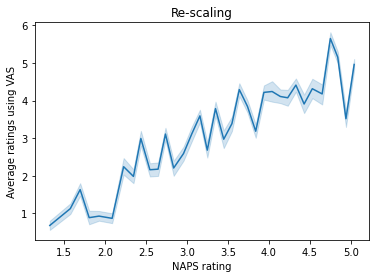

In [4]:
ax = sns.lineplot(data=df_long, x='NAPSr', y='scale_rating')

ax.set(xlabel='NAPS rating',
       ylabel='Average ratings using VAS',
       title='Re-scaling')
#,hue='PTSD')


In [5]:
df = df_long.groupby(['pic']).mean()['scale_rating'].reset_index()
df.to_csv('../pics/new_ratings.csv', index=False)